# NAME : Akshay Kamate
# BATCH: AUG-03


# Tasks
## 1. Data clean up – Missing value treatment


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
ps = pd.read_csv("plystore-analysis.csv.csv")

In [3]:
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


ps.isnull().sum()

## a. Drop records where rating is missing since rating is our target/study variable

In [5]:
ps.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [6]:
ps.Rating.isnull().sum()

0

## b. Check the null values for the Android Ver column.
### i. Are all 3 records having the same problem?

In [7]:
ps.loc[ps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


yes, all 3 records having same problem ie. all are NaN

###  ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [8]:
ps.drop([10472], inplace = True)

In [9]:
ps.loc[ps['Android Ver'].isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN


### iii. Replace remaining missing values with the mode

In [10]:
ps['Android Ver'].fillna(ps['Android Ver'].mode()[0], inplace=True)

### c. Current ver – replace with most common value

In [11]:
ps['Current Ver'].fillna(ps['Current Ver'].mode()[0], inplace=True)

# 2. Data clean up – correcting the data types

### a. Which all variables need to be brought to numeric types?

## Review and install need to be brought to numeric types 

### b. Price variable – remove $ sign and convert to float

In [12]:
price = []
for i in ps['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i) 

In [13]:
ps.drop(labels=ps[ps['Price']=='Everyone'].index, inplace = True)
ps['Price']= price
ps['Price']= ps['Price'].astype('float')

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [14]:
install = []
for j in ps['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

ps['Installs']= install
ps['Installs']= ps['Installs'].astype('int')

### d. Convert all other identified columns to numeric

In [15]:
ps['Reviews']= ps['Reviews'].astype('int')

# 3. Sanity checks – check for the following and handle accordingly

## a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore

### i. Are there any such records? Drop if so.

In [16]:
ps.loc[ps.Rating < 1] & ps.loc[ps.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no such records with rating less than 1 and greater 5

## b. Reviews should not be more than installs as only those who installed can review the app

### i. Are there any such records? Drop if so.

In [17]:
ps.loc[ps['Reviews'] > ps['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00000,1,Free,0.00,Everyone,Medical,02-Aug-18,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.52952,10000,Paid,2.49,Everyone,Lifestyle,30-Jul-18,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.00000,1,Paid,1.49,Everyone,Arcade,08-Feb-17,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.00000,5,Free,0.00,Everyone,Arcade,23-Jul-18,1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.00000,10,Free,0.00,Everyone,Arcade,11-Mar-17,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.00000,10,Free,0.00,Teen,Social,23-Jul-18,1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.00000,1,Paid,0.99,Everyone,Arcade,03-Mar-17,1,2.3 and up


yes, there is 7 such records are there

In [18]:
temp = ps[ps['Reviews']>ps['Installs']].index
ps.drop(labels=temp, inplace=True)

In [19]:
ps.loc[ps['Reviews'] > ps['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 4. Identify and handle outliers –
## a. Price column
### i. Make suitable plot to identify outliers in price

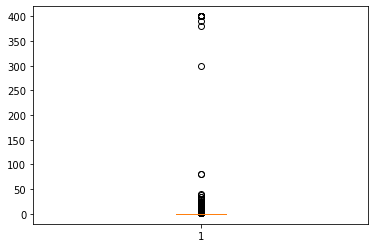

In [20]:
plt.boxplot(ps['Price'])
plt.show()

### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [21]:
print('Yes we can expect apps on the play store to cost $200')
ps.loc[ps['Price'] > 200]

Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,03-May-18,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,12-Jan-18,2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,19-May-18,3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,21-Jul-18,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,12-Nov-17,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,01-Jul-18,1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,11-Dec-17,1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,01-May-17,3.4,4.4 and up


### iv. Limit data to records with price < $30

In [22]:
gt_30 = ps[ps['Price'] > 30].index
ps.drop(labels=gt_30, inplace=True)

In [23]:
count = ps.loc[ps['Price'] > 30].index
count.value_counts().sum()

0

### iii. After dropping the useless records, make the suitable plot again to identify outliers.

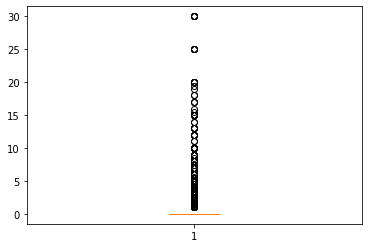

In [24]:
plt.boxplot(ps['Price'])
plt.show()

## b. Reviews column
### i. Make suitable plot

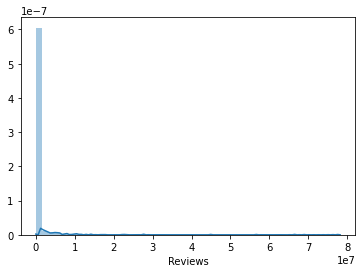

In [25]:
sns.distplot(ps['Reviews'])
plt.show()

### ii. Limit data to apps with < 1 Million reviews

In [26]:
gt_1m = ps[ps['Reviews'] > 1000000 ].index
ps.drop(labels = gt_1m, inplace=True)
print(gt_1m.value_counts().sum(),'cols dropped')

704 cols dropped


## c. Installs
### i. What is the 95th percentile of the installs?

In [27]:
percentile = ps.Installs.quantile(0.95) 
print(percentile,"is 95th percentile of Installs")

10000000.0 is 95th percentile of Installs


### ii. Drop records having a value more than the 95th percentile

In [28]:
for i in range(0,101,1):
    print(' the {} percentile of installs is {} '.format(i,np.percentile(ps['Installs'],i)))

 the 0 percentile of installs is 5.0 
 the 1 percentile of installs is 50.0 
 the 2 percentile of installs is 100.0 
 the 3 percentile of installs is 100.0 
 the 4 percentile of installs is 100.0 
 the 5 percentile of installs is 100.0 
 the 6 percentile of installs is 500.0 
 the 7 percentile of installs is 500.0 
 the 8 percentile of installs is 1000.0 
 the 9 percentile of installs is 1000.0 
 the 10 percentile of installs is 1000.0 
 the 11 percentile of installs is 1000.0 
 the 12 percentile of installs is 1000.0 
 the 13 percentile of installs is 1000.0 
 the 14 percentile of installs is 1000.0 
 the 15 percentile of installs is 1000.0 
 the 16 percentile of installs is 5000.0 
 the 17 percentile of installs is 5000.0 
 the 18 percentile of installs is 5000.0 
 the 19 percentile of installs is 5000.0 
 the 20 percentile of installs is 5000.0 
 the 21 percentile of installs is 10000.0 
 the 22 percentile of installs is 10000.0 
 the 23 percentile of installs is 10000.0 
 the 24 pe

In [29]:
temp1 = ps[ps["Installs"] > percentile].index
ps.drop(labels = temp1, inplace = True)
print(temp1.value_counts().sum())#,'cols dropped')

199


## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values.
### a. How do you explain this?

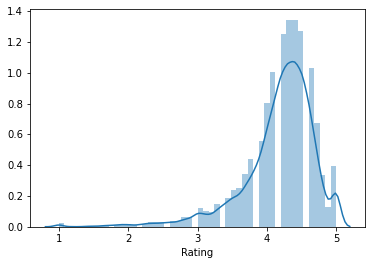

The skewness of this distribution is -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution


In [30]:
sns.distplot(ps['Rating'])
plt.show()
print('The skewness of this distribution is',ps['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(ps.Rating.median(),ps.Rating.mean()))

## b. What is the implication of this on your analysis?

In [31]:
ps['Rating'].mode()

0    4.3
dtype: float64

#### Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.



## 6. What are the top Content Rating values?
### a. Are there any values with very few records?

In [32]:
ps['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### Adults only 18+ and Unrated are values with very few records so we drop them

### b. If yes, drop those as they won’t help in the analysis

In [33]:
#Replacing unwanted values with NaN
cr = []
for k in ps['Content Rating']:
    cr.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

ps['Content Rating']=cr

In [34]:
# Droping the NaN values.
temp2 = ps[ps["Content Rating"] == 'NaN'].index
ps.drop(labels=temp2, inplace=True)
print('droped cols',temp2)

droped cols Int64Index([298, 3043, 6424, 8266], dtype='int64')


In [35]:
ps['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

## 7. Effect of size on rating

### a. Make a joinplot to understand the effect of size on rating

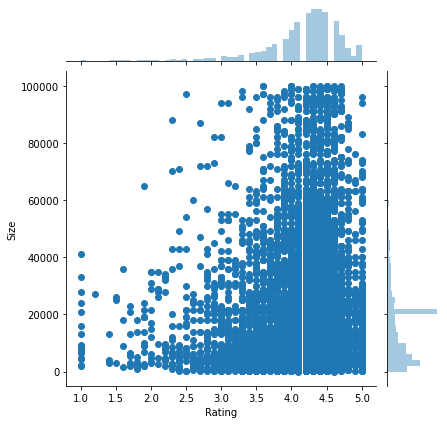

In [36]:
sns.jointplot(y ='Size', x ='Rating', data = ps, kind ='scatter')
plt.show()

## b. Do you see any patterns?

### Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating

## c. How do you explain the pattern?

### Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

## 8. Effect of price on rating
### a. Make a jointplot (with regression line)

In [39]:
import warnings 
warnings.simplefilter('ignore')

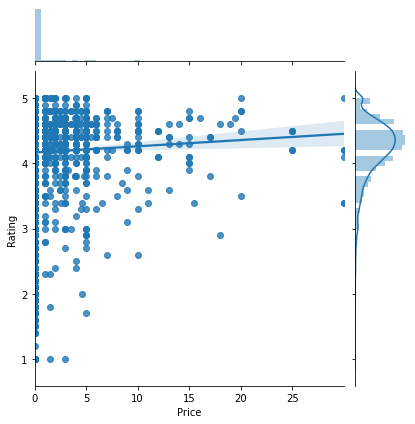

In [40]:
sns.jointplot(x='Price', y='Rating', data=ps, kind='reg')
plt.show()

## b. What pattern do you see?

### Generally on increasing the Price, Rating remains almost constant greater than 4

## c. How do you explain the pattern?

### Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price

In [44]:
ps.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


## d. Replot the data, this time with only records with price > 0

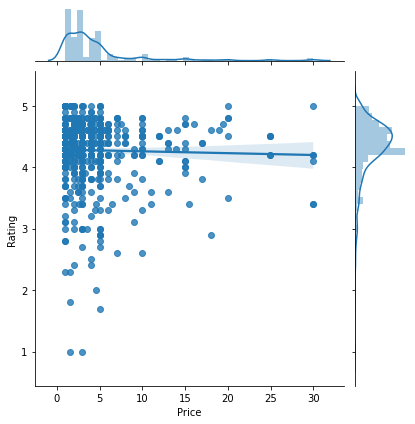

In [45]:
ps1=ps.loc[ps.Price>0]
sns.jointplot(x='Price', y='Rating', data=ps1, kind='reg')
plt.show()

## e. Does the pattern change?

### Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating

In [46]:
ps1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


## f. What is your overall inference on the effect of price on the rating

### Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4



## 9. Look at all the numeric interactions together –
### a. Make a pairplot with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

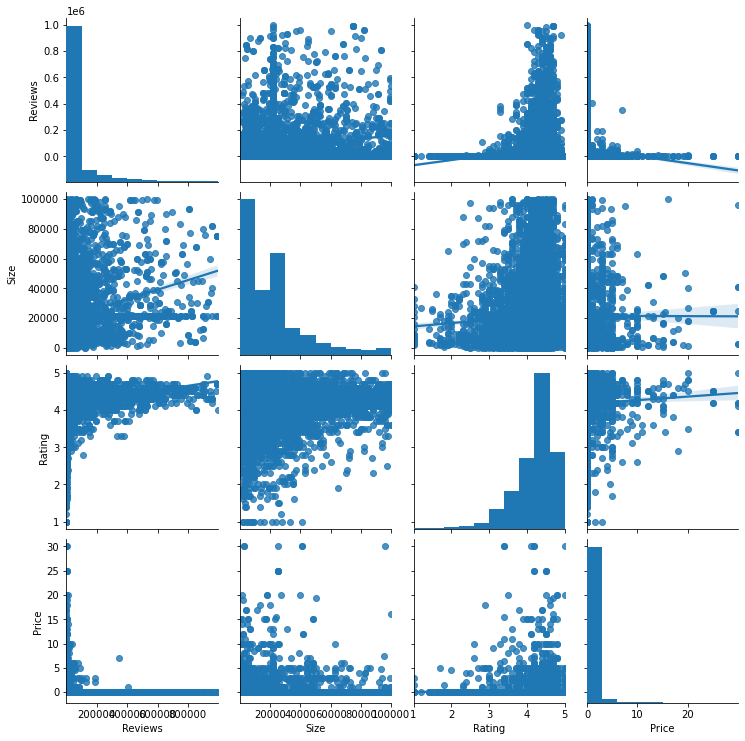

In [47]:
sns.pairplot(ps, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

## 10. Rating vs. content rating
### a. Make a bar plot displaying the rating for each content rating

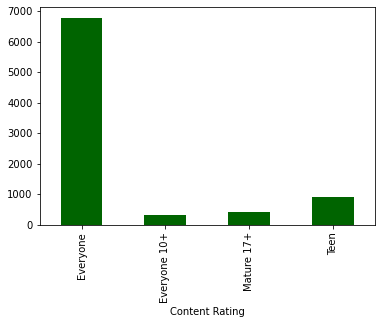

In [48]:
ps.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

## b. Which metric would you use? Mean? Median? Some other quantile?

### We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency

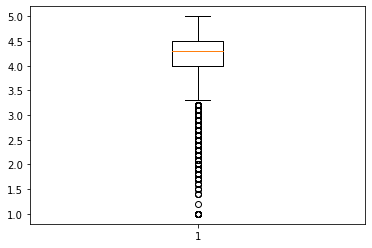

In [49]:
plt.boxplot(ps['Rating'])
plt.show()

## c. Choose the right metric and plot

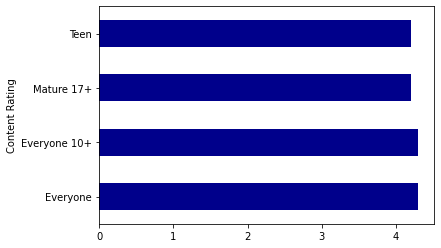

In [51]:
ps.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkblue")
plt.show()

## 11. Content rating vs. size vs. rating – 3 variables at a time
### a. Create 5 buckets (20% records in each) based on Size

In [53]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
ps['Bucket Size'] = pd.cut(ps['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(ps, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


## b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [55]:
temp3=pd.pivot_table(ps, values='Rating', index='Bucket Size', 
columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


## c. Make a heatmap of this
### i. Annotated

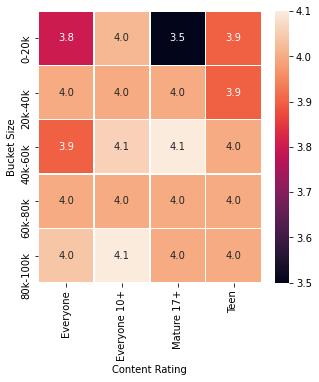

In [56]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

### ii. Greens color map

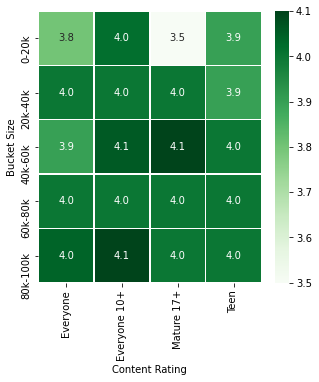

In [57]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

### Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories